In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!wget http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/southamptondata.txt

--2015-08-13 21:43:29--  http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/southamptondata.txt
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 2.20.183.171, 2.20.183.152
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|2.20.183.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89374 (87K) [text/plain]
Saving to: ‘southamptondata.txt’

southamptondata.txt 100%[=====================>]  87.28K   487KB/s   in 0.2s   

2015-08-13 21:43:29 (487 KB/s) - ‘southamptondata.txt’ saved [89374/89374]



In [23]:
pd.read_csv?

In [42]:
dateparse = lambda x, y: pd.datetime.strptime(x+" "+y, '%Y %m')
remove_star = lambda x: x.replace("*", "")
df = pd.read_csv("southamptondata.txt", skiprows=[0, 1, 2, 3, 4, 6], sep=" ", skipinitialspace=True, 
                 na_values="---", parse_dates={'date': [0, 1]}, date_parser=dateparse, skipfooter=1, 
                 converters={2:remove_star, 3:remove_star, 4:remove_star, 5:remove_star})
df.head()

,date,tmax,tmin,af,rain,sun
0,1855-01-01 00:00:00,5.0,0.5,16,NaN,NaN
1,1855-02-01 00:00:00,2.4,-3.5,21,54.3,NaN
2,1855-03-01 00:00:00,7.9,0.8,12,61.3,NaN
3,1855-04-01 00:00:00,13.7,3.6,4,10.1,NaN
4,1855-05-01 00:00:00,15.0,5.6,2,60.0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 1742
Data columns (total 6 columns):
date    1743 non-null datetime64[ns]
tmax    1732 non-null object
tmin    1736 non-null float64
af      1736 non-null object
rain    1742 non-null object
sun     1142 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 95.3+ KB


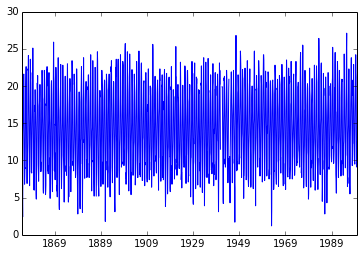

In [45]:
dates = df.date.values
rain = df.rain.values
tmax = df.tmax.values

plt.plot(dates, tmax)